# Chapter 3. Data Scientist's Toolbox

[*Applied Machine Learning for Health and Fitness*](https://www.apress.com/9781484257715) by Kevin Ashley (Apress, 2020).

[*Video Course*](http://ai-learning.vhx.tv) Need a deep dive? Watch my [*video course*](http://ai-learning.vhx.tv) that complements this book with additional examples and video-walkthroughs. 

[*Web Site*](http://activefitness.ai) for research and supplemental materials.


## Data Science Tools

A typical workflow for a sport scientist involves working with coaches, athletes, collecting data and then analyzing it. In this book, we treat each practical project as a field experiment. We approach it with the same methodology we'll use for any other sport data science project. Being organized about our tools is part of the success.

## Languages 

These days many data scientists use open source tools, such as Python, R and Julia became very popular. MATLAB is one of the oldest commercial languages and tools for numerical computing, dating back to 1970. In this book, most of the code is in Python, with some C code written for chapters dedicated to real-time sensors, and other languages given for illustration.

Python grows especially rapidly (about +2.22% yearly growth according to TIOBE index, vs R + 0.03% at the time of writing this book), being somewhat an easy to start with, general purpose computing language, so most data science packages are available in Python.

## Virtual Environments

Think of a virtual environment as a sandbox for your data science projects. They are a great way to work and keep things organized, because of the isolation needed in multiple projects, with multiple tools and dependencies. Traditionally, in Python ecosystem, there's several ways to create a virtual environment, the most commonly used are: virtualenv, pipenv and then there's conda. Anaconda appeals to many data scientists because it's so easy to start with, and it has a great deal of data science tools. 

In [17]:
# listing environments in conda
!conda env list

# conda environments:
#
base                  *  C:\ProgramData\Anaconda3
py2                      C:\ProgramData\Anaconda3\envs\py2
tf-gpu                   C:\ProgramData\Anaconda3\envs\tf-gpu



You can check the current environment in which your code is running:

In [21]:
# check current environment in Python
import os
print(os.environ['CONDA_DEFAULT_ENV'])

base


## Notebooks

I realized this book needs a special section on notebooks, because, frankly, they are so cool and useful for any data scientist! 

In [7]:
import datetime, time
now = datetime.datetime.now()
if now.hour >= 5 and now.hour < 12:
    print("A fresh Jupyter feels like a morning cup of coffee!")
print("Keep working")

Keep working


Jupyter notebooks started with IPython project in 2014, the name coming, perhaps, from Galileo notebooks discovering moons of Jupyter. Besides Python, notebooks also support R and Julia, languages that became very popular in data science: even the name Jupyter is actually an abbreviation from *JU*lia, *PYT*hon and *R,* but other languages are also supported, although a little more work and patience may be needed.


### Markdown, LaTeX

When you type in Jupyter notebooks, besides code cells there're also markdown cells, this is where you can put text. For scientific notation, LaTeX historically has been the standard, and notebooks provide full support for it.



In [2]:
%%latex
\begin{align}
F=ma
\end{align}

<IPython.core.display.Latex object>

In [2]:
from IPython.display import display, Math, Latex
display(Math(r'F = ma'))

<IPython.core.display.Math object>

### Notebooks in the cloud

While running data science projects on your local computer may be sufficient for some time, running notebooks in the cloud may be necessary for many reasons. Fortunately, you have many options: Microsoft Azure, Google Colaboratory (https://colab.research.google.com/) and others. There's typically a free account that allows you to do some experimentation, and more extended paid options.

**Note:** A great feature of a notebook is its ability to keep state and data, and you should be careful about it for the same exact reason! Too much data embedded in the notebook makes it huge and hard to manage, so you should know what you are doing.

### Magic commands

Notebooks include many “magic” commands that you can use to accomplish various tasks that don’t necessarily belong in the kernel. 

With each release, the number of commands grows, so you can access the latest list with %%lsmagic, which gives you a complete list of magical things:


In [13]:
# List magic commands in Jupyter
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %conda  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%

For example, we earlier used %run command to execute external Python scripts. Another useful magic is %%timeit. Timing scripts may become important, especially while training models, and notebooks provide convenient magic for that:

In [1]:
%%timeit
"-".join([str(n) for n in range(100)])

17.8 µs ± 630 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


## Data

Even the name data science presumes that we work with data a lot! In this book I have a dedicated chapter for working with data: in this chapter we'll touch the basics of two libraries that are essential in most data science projects in Python: Numpy and pandas.

### Numpy

Numpy is one of the most fundamental scientific libraries in Python, representing N-dimensional arrays. In data science Numpy is ubiquitous and provides internal data representation for most datasets: in addition to fast performance, it provides efficient operations with indexing, slicing, statistics and persistence.

The following code snippet loads an image of a jumping kiteboarder using PIL library, then converts it to Numpy array using np.array() method, and uses Numpy shape property to display size of the image. Note that the Numpy image also includes image channels as the third dimension:

In [36]:
from PIL import Image
import numpy as np

# Load image using PIL
im = Image.open('media/kiteboard_jump.jpg') 
# make a numpy array
arr = np.array(im)
# print shape (size)
print('shape:',arr.shape)

shape: (512, 512, 3)


We can use Numpy slicing and indexing to quickly select areas of the image that interests us, by simply specifying rows and columns in the array, the resulting image is 300x300 pixels:

In [39]:
kiteboarder = arr[:300,100:400]
print('new shape:',kiteboarder.shape)

new shape: (300, 300, 3)


Next, let’s display both images using Matplotib library (described later in this chapter):

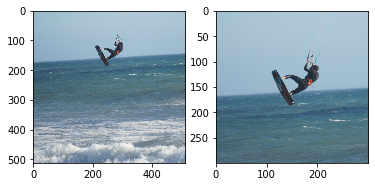

In [6]:
import matplotlib.pyplot as plt 
%matplotlib inline

fig, ax = plt.subplots(ncols=2)
ax[0].imshow(im)
ax[1].imshow(kiteboarder)
plt.show()


### Data modeling and pandas

NumPy provides powerful multi-dimensional array operations, and you can also persist and load data from arrays, using save() and load() methods, but to work with other data formats, such as Excel or CVS, and model data in tabular form, we can use another library called pandas, which stands for Python Data Analysis Library.

Pandas library is built on top of Numpy, it provides several data structures that turn out to be very useful in data science: Series and DataFrames. Series are one-dimensional arrays, in the example below we create a Series object, from a random sample of 5 values:

In [15]:
import numpy as np
import pandas as pd
from IPython.display import display, HTML

s = pd.Series(np.random.randn(5))
print(s)

0   -0.394398
1   -0.193998
2    0.935929
3    0.882162
4    0.024625
dtype: float64


DataFrames object is what makes pandas very useful in our research. DataFrames add standard operations on rows and columns of tabular data, grouping and pivoting. In the following example, here's some stats from my Active Fitness sports app (<http://activefitness.co>), showing grouping of trails that people track with the app, by type of activity (summer or winter):

In [16]:
d = {'category':['summer','summer','summer','summer','winter', 'all-season', 'summer', 'winter','winter','summer', 'summer'], 
     'sports':['running','walking','cycling','hiking','alpine ski', 'dog walking', 'mountain bike',  'cross country ski', 'snowboard', 'inline skating', 'trekking'],
     'trails':[323909,174189,85908,56751,40339,33573,9957,8817,8674,5495,3051]
    }
df = pd.DataFrame(d)
display(df)

category             sports  trails
0       summer            running  323909
1       summer            walking  174189
2       summer            cycling   85908
3       summer             hiking   56751
4       winter         alpine ski   40339
5   all-season        dog walking   33573
6       summer      mountain bike    9957
7       winter  cross country ski    8817
8       winter          snowboard    8674
9       summer     inline skating    5495
10      summer           trekking    3051

As you can see, from about a million trails tracked by users of Active Fitness platform, most are summer activities: running, walking and cycling. Followed by alpine ski as the most popular winter activity. Using pandas, we can quickly show statistics for a dataset, by using describe() method:

In [17]:
df.groupby('category').describe()

trails                                                          \
            count          mean            std      min      25%      50%   
category                                                                    
all-season    1.0  33573.000000            NaN  33573.0  33573.0  33573.0   
summer        7.0  94180.000000  118257.661585   3051.0   7726.0  56751.0   
winter        3.0  19276.666667   18240.655864   8674.0   8745.5   8817.0   

                                
                 75%       max  
category                        
all-season   33573.0   33573.0  
summer      130048.5  323909.0  
winter       24578.0   40339.0

## Visualization

Data science may be complex without visualizing data and models. It is often important to convey results of our research to those who may not necessarily have the deep knowledge of our data. In sports coaching, we often use VAK (visual, auditory, kinesthetic) model for categories of learning styles. Not surprisingly, most humans are visual learners, because our brain's neural nets work very efficiently analyzing visual information. Fortunately, we have lots of tools to visualize data science!

![](images/ch3/image11.png)

## Matplotlib

Matplotlib library is one of the most widely used tools in modern data science, it was originally created by John D. Hunter, a neurobiologist. Let's get some of the modules we may need, notice that we use notebook's magic command %matplotlib inline to display visualizations in the notebook.

For a practical example, let’s load one of the scans of my knee, using pydicom, a library that can read MRI data and play with the results in Matplotlib. If you haven’t installed pydicom, you can do it easily with pip right from your notebook or command shell:

In [7]:
!pip install pydicom

You can then import pydicom into your notebook as follows, and then load one of the files with dcmread method:

In [8]:
import os, sys

dicom_file = 'data/mri/knee.dcm'
output_path = "_output/"
if not os.path.exists(output_path):
    os.makedirs(output_path)

In [9]:
import pydicom as dicom

ds = dicom.dcmread(dicom_file)
print(ds.StudyDescription)

Knee R


This library also includes anonymized MRI datasets, so we’ll have plenty of data to play with for our visualization endeavors. Remember, data science is all about data!

To import Numpy module and display the size of the image array we just loaded earlier from the MRI scan, simply run the following code. Notice, that pixel_array property from the example above also gives us a Numpy array representing the image, no further conversion necessary! Let’s also use Numpy to check shape (dimensions and size), as well as min, max and mean values, we’ll need them later:


In [22]:
import numpy as np 

img = ds.pixel_array
if not os.path.exists(output_path+'data/mri/'):
    os.makedirs(output_path+'data/mri/')
np.save(output_path + dicom_file+".npy", img)
print(f'shape={np.shape(img)}')
print(f'min={img.min()}, max={img.max()}')
print(f'mean={img.mean()}')


shape=(512, 512)
min=0, max=1140
mean=97.69543075561523


Conveniently, Matplotlib includes even a color map for bone tissue (plt.cm.bone) to display our scans:

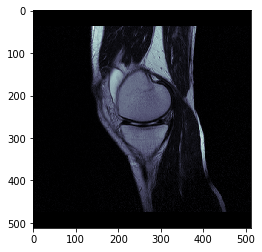

In [12]:
import matplotlib.pyplot as plt 
%matplotlib inline 

plt.imshow(img, cmap=plt.cm.bone)
plt.show()

As data scientists we’d like to study our scan to see if we can perhaps isolate regions on it, for example to identify features or areas of interest, so we create what’s called a binary mask, an image that contains only 1s for highlighted areas and 0s for everything else. This type of analysis is often used in machine learning, areas like semantic segmentation. First we fill an array of the same shape as our image with zeroes, then highlight everything we need relative to the mean of the array:

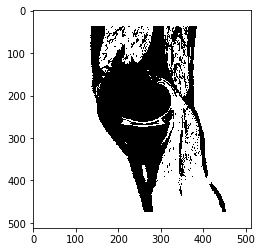

In [23]:
# Creating binary mask
arr = np.zeros(img.shape)
mask = img <= img.mean()
arr[mask] = 1
mask = img > img.mean()
arr[mask] = 0
plt.imshow(arr, cmap=plt.cm.bone)
plt.show()

The true power of Matplotlib is in its ability to plot. From the previous example of sports by number of users in Active Fitness, here’s a quick bar chart:

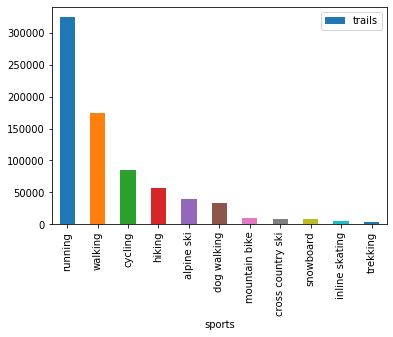

In [24]:
import matplotlib.pyplot as plt
df.plot(kind='bar', x='sports', y='trails')
plt.show()

## SciPy, scikit-image

Numpy provides basic array manipulations, and as you can see, allows implementing some image transformations. If we need to use more advanced algorithms, SciPy ecosystem of scientific libraries for Python provides a wealth of those. Let's say we want to detect an edge on the MRI scan image we just loaded. In computer vision Sobel operator is often used for edge detection (you can also check Scharr, Prewitt, Roberts or Canny), and fortunately scikit-image contains most of these methods built-in:

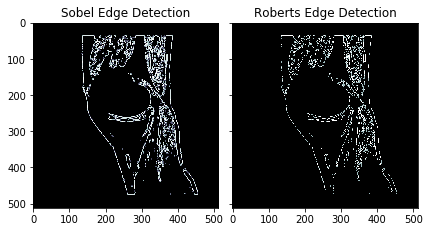

In [35]:
from skimage import filters

edge_sobel = filters.sobel(arr)
edge_roberts = filters.roberts(arr)
fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True)
ax[0].imshow(edge_sobel, cmap=plt.cm.bone)
ax[0].set_title('Sobel Edge Detection')
ax[1].imshow(edge_roberts, cmap=plt.cm.bone)
ax[1].set_title('Roberts Edge Detection')
plt.tight_layout()
plt.savefig('fig_3-14.png',dpi=300)
plt.show()

**Note**: In this example we use subplot() feature in Matplotlib to combine plots together.

For image segmentation we can use both supervised and unsupervised methods: for example, thresholding with human input can be considered a supervised approach, while SLIC segmentation in the following example is unsupervised. Scikit-image includes several segmentation filters, including Watershed, SLIC, Quickshift etc. In the following example, we use SLIC to reduce a 512x512 image to 256 segments:

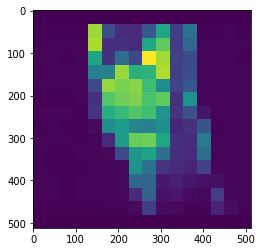

In [20]:
import skimage
from skimage.color import rgb2gray, label2rgb
from skimage.filters import sobel
from skimage.segmentation import felzenszwalb, slic, quickshift, watershed
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float

img = ds.pixel_array
segments_slic = slic(img, n_segments=256)
segments_slic_image = skimage.color.label2rgb(segments_slic, img, kind='avg')
plt.imshow(segments_slic_image)
plt.show()

### Project 3-1: Using active contours segmentation 

From supervised image segmentation methods, it's worth mentioning snakes (or active contours) methods. Let's see how we can use snakes to select a body part from the image. Sport movement analysis often requires isolation of body parts, and this segmentation provides the first step in that direction.

In the following snippet we'll use Python image library PIL to load this image and convert it into Numpy array:

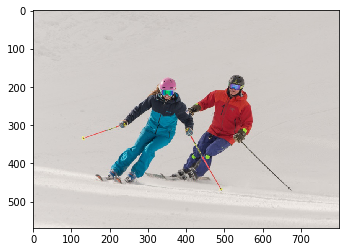

In [33]:
from PIL import Image

image = Image.open('media/skiers.jpg')
img = np.array(image)
plt.imshow(img)
plt.show()

Next, we use scikit-image to initialize a circular area and let snakes (active_contour method) fit the spline to lines and edges on the image of the athlete. This approach is supervised, because we need to define the initial region.

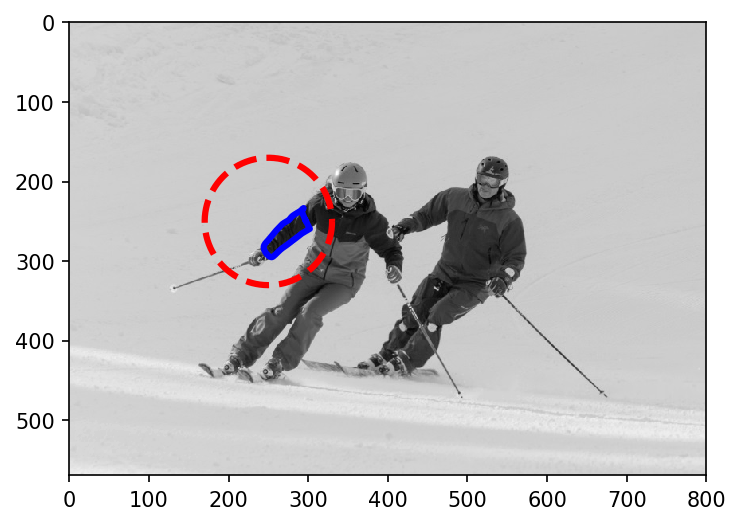

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage import data
from skimage.filters import gaussian
from skimage.segmentation import active_contour

# make image gray tone
img = rgb2gray(img)
# initialize spline
s = np.linspace(0, 2*np.pi, 200)
init = 80*np.array([np.cos(s), np.sin(s)]).T + 250
# fit spline to image
snake = active_contour(gaussian(img, 3),init)

fig, ax = plt.subplots(dpi=150)
ax.imshow(img, cmap=plt.cm.gray)
ax.plot(init[:, 0], init[:, 1], '--r', lw=3)
ax.plot(snake[:, 0], snake[:, 1], '-b', lw=3)
ax.axis([0, img.shape[1], img.shape[0], 0])
plt.savefig('fig_3-16.png',dpi=300)
plt.show()

In this example, we used a circle to provide an area for active contours algorithm. In more sophisticated scenarios, methods such as Grabcut, developed and open sourced by Microsoft researchers Rother, Kolmogorov and Blake could be used to isolate segments, based on multiple masks. In this book, we'll use Grabcut in more details Part II: Computer Vision.

## OpenCV

OpenCV has been an important part of computer vision toolset and includes, besides core image and video processing, 2D and 3D methods for features and reconstruction, deep neural networks (DNN) and learning modules, as well as methods such as optical flow.

The idea behind optical flow is that intensity (or brightness) of an object $I$ between two images taken at time *t*, assuming movement is small, doesn't change:

$$V_{x}\ \frac{\partial I}{\partial x} + V_{y}\ \frac{\partial I}{\partial y}\  + \ \frac{\partial I}{\partial t} = 0$$

We use OpenCV VideoCapture() method that allows capturing both from camera or video file, then at each frame we use Lucas-Kanade method: calcOpticalFlowPyrLK() from OpenCV that returns 1 when a point is found in the next frame:


In [ ]:
# Note: this script needs to open a window!
import cv2
import numpy as np
from datetime import timedelta
import time
from scipy.spatial import distance as dist
import os, sys

# Video
video = cv2.VideoCapture("media/diving.mp4")

point = (732, 412)
old_points = np.array([point], dtype=np.float32)
point_selected = True

# Lucas-Kanade params
lk_params = dict(winSize = (15, 15),
                 maxLevel = 4,
                 criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

cv2.namedWindow("Frame")
color = np.random.randint(0,255,(100,3))

# Create old frame
_, frame = video.read()
h,w,channels = frame.shape
if not os.path.exists(output_path):
    os.makedirs(output_path)
out = cv2.VideoWriter(output_path+"diving_out.mp4",cv2.VideoWriter_fourcc(*'MP4V'), 5, (w,h))
old_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
mask = np.zeros_like(frame)

lowest_point = 0
start = None
THRESH = 50

while True:
    _, frame = video.read()
    if frame is None:
        break
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    new_points, status, error = cv2.calcOpticalFlowPyrLK(old_gray, gray_frame, old_points, None, **lk_params)
    old_gray = gray_frame.copy()

    for i,(new,old) in enumerate(zip(new_points,old_points)):
        a,b = new.ravel()
        if start is None:
            start = a
        c,d = old.ravel()
        mask = cv2.line(mask, (a,b),(c,d), color[i].tolist(), 2)
        frame = cv2.circle(frame,(a,b),5,color[i].tolist(),-1)
        if b > lowest_point and abs(a - start) <= THRESH:
            low = np.zeros_like(frame)
            low = cv2.circle(low, (a,b), 5, color[i+1].tolist(), -1)
            lowest_point = b
    img = cv2.add(frame,mask) 
    img = cv2.add(img, low)
    cv2.imshow('Frame',img)
    out.write(img)

    old_points = new_points.reshape(-1,2)
        
    key = cv2.waitKey(1)
    if key == 27:
        break
 
video.release()
out.release()
cv2.destroyAllWindows()

# Deep learning frameworks

For deep learning tasks, we typically need tools that are optimized to work with GPUs. In this book we will use Pytorch, Keras and Tensorflow for some of the deep learning projects. For reinforcement learning, you will also find examples with Open AI Gym and some other libraries like RL baselines.

## PyTorch

>I've been using PyTorch a few months now and I've never felt better. I have more energy. My skin is clearer. My eye sight has improved.
Andrej Karpathy

PyTorch is an open source machine learning framework originally based on Torch, and largely developed by Facebook AI research lab. In recent years PyTorch gained popularity among data scientists and features NumPy based tensor operations with torch.Tensor object. At the low level PyTorch uses an automatic differentiation, called autograd system to take gradients, nn module for higher level neural networks. As a fully featured deep learning library, PyTorch has modules for data augmentation and loading.

Many examples in this book are in PyTorch, including video action recognition, as well as classification examples. One interesting feature of PyTorch is the module called torchvision, which includes many models for deep vision, including automatically fetched pre-trained models. Since this book is about applied practical methods, taking advantage of pretrained models for transfer learning helps a lot!

## TensorFlow

TensorFlow is another popular open source framework, originally developed by Google Brain team. TensorFlow is very popular for many reasons: it has a huge support from the opensource community, as well as Google AI team. Building models at high level with Tensorflow is easy with another open source library called Keras. TensorFlow has interesting features, including ability to run in JavaScript environments, mobile and edge devices. For example, body pose estimation example explained further in this book, can run near real time in your browser with Tensorflow.


## Keras

If you don’t use Keras, and you are starting your journey as a data scientist, you probably should! Keras is especially popular at making model prototyping easy. Here’s how easy it is to make a multi-layer model with Keras:

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(units=64, activation='relu', input_dim=10))
model.add(Dense(units=10, activation='softmax'))

# Reinforcement Learning

Reinforcement learning (RL) is learning what to do by trying, and taking the next action based on the reward. In Chapter 10 of this book you’ll see many practical examples of using reinforcement learning for sports, health and fitness applications. 

## OpenAI Gym 

Reinforcement learning toolkits like OpenAI Gym are popular with data scientists, and in this book you will find OpenAI Gym examples. In addition to the environment, many libraries have emerged recently that include methods and algorithms for reinforcement learning: Deep Q Networks (DQN), Deep Deterministic Policy Gradients (DDPG), Generative Adversarial Limitation Learning (GALL) and various implementations of Actor Critic (A2C). OpenAI has been created as a simulation environment, a playground to unfold the “scene” of the action and train models. It remains open for research and at what algorithms should be employed to solve actual problems, with main areas being: games, 2D physics problems on Box2D, classic control physics, 3D physics and robotics, such as PyBullet and text.

## Cloud, automation and operationalization

You’ll see the term CI/CD (Continuous Integration/Continuous Delivery) many times referring to the development cycle in machine learning, and the last chapters of this book we’ll be using some practical examples and cloud based tools for taking your research to the level of best practices and standards used in modern data science

## Summary

This chapter provides an overview of some of the basic tools you may need as a data scientist in health and fitness. In the next chapter we'll dive into machine learning and deep learning tools and technologies. 

## Reference

[*Video Course*](http://ai-learning.vhx.tv) Need a deep dive? Watch my [*video course*](http://ai-learning.vhx.tv) that complements this book with additional examples and video-walkthroughs. 

[*Web Site*](http://activefitness.ai) for research and supplemental materials.


 

 [1]: images/ch3/image1.png 
  [2]: images/ch3/image2.png 
  [3]: images/ch3/image3.png 
  [4]: images/ch3/image4.png 
  [5]: images/ch3/image5.png 
  [6]: images/ch3/image6.png 
  [7]: images/ch3/image7.png 
  [8]: images/ch3/image8.png 
  [A screenshot of a video game Description automatically generated]: images/ch3/image9.png 
  [9]: images/ch3/image10.png 
  [10]: images/ch3/image11.png 
  [11]: images/ch3/image12.png 
  [12]: images/ch3/image13.png 
  [A screenshot of a cell phone Description automatically generated]: images/ch3/image14.png 
  [13]: images/ch3/image15.png 
  [14]: images/ch3/image16.png 
  [A picture containing athletic game, sport Description automatically generated]: images/ch3/image17.png 
  [15]: images/ch3/image18.png 
  [16]: images/ch3/image19.png 
